In [1]:
import pandas as pd
import numpy as np
import re, string
import nltk
import random
import sklearn
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///reviews.db', echo=False)

In [4]:
#got just the reviews
rest_reviews= engine.execute('SELECT text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id').fetchall()


In [5]:
#got the reviews and ratings to match up 
rest_reviews_rating= engine.execute('SELECT reviews.stars, text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id').fetchall()


In [30]:
#taking one star reviews by random and limiting to 40000

one_star_reviews= engine.execute('SELECT text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id WHERE reviews.stars= 1.0 ORDER BY RANDOM() LIMIT 10000').fetchall()


In [31]:
two_star_reviews= engine.execute('SELECT reviews.stars, text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id WHERE reviews.stars= 2.0 ORDER BY RANDOM() LIMIT 40000').fetchall()


In [3]:
three_star_reviews= engine.execute('SELECT reviews.stars, text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id WHERE reviews.stars= 3.0 ORDER BY RANDOM() LIMIT 40000').fetchall()


In [4]:
four_star_reviews= engine.execute('SELECT reviews.stars, text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id WHERE reviews.stars= 4.0 ORDER BY RANDOM() LIMIT 40000').fetchall()


In [3]:
five_star_reviews= engine.execute('SELECT reviews.stars, text FROM reviews INNER JOIN business ON reviews.business_id=business.business_id WHERE reviews.stars= 5.0 ORDER BY RANDOM() LIMIT 40000').fetchall()


In [19]:
business = pd.read_csv('business.csv')

In [20]:
reviews= pd.read_csv('reviews.csv')
user = pd.read_csv('user.csv')

/home/mubarakb/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,NaN,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,NaN,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,NaN,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5


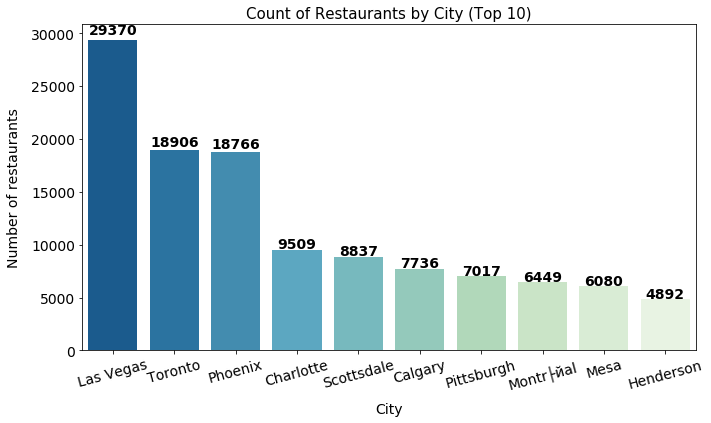

In [16]:
plt.figure(figsize=(11,6))
grouped = business.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

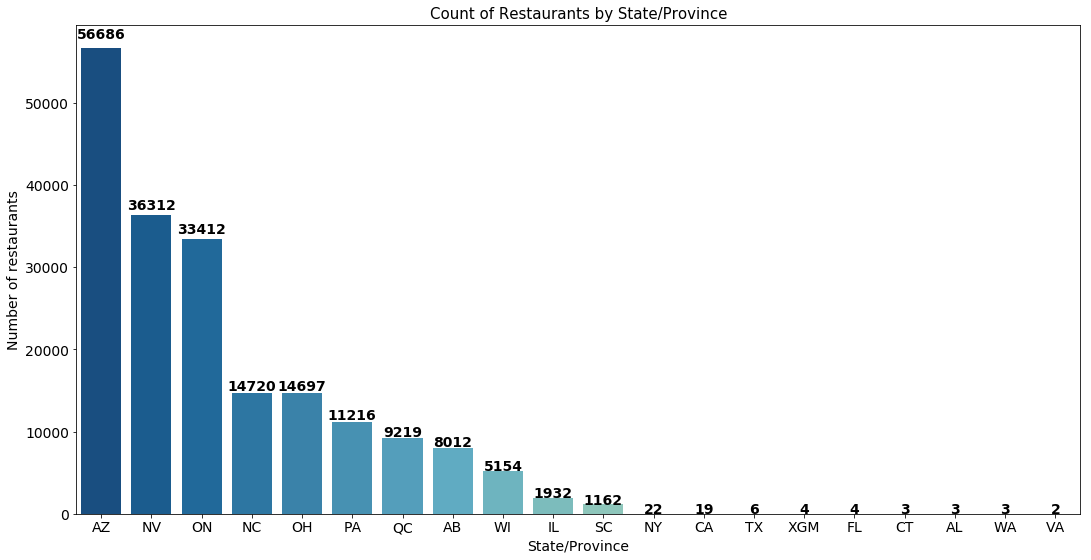

In [29]:
plt.figure(figsize=(18,9))
grouped = business.state.value_counts()[:20]
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State/Province', fontsize=14)
plt.title('Count of Restaurants by State/Province', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

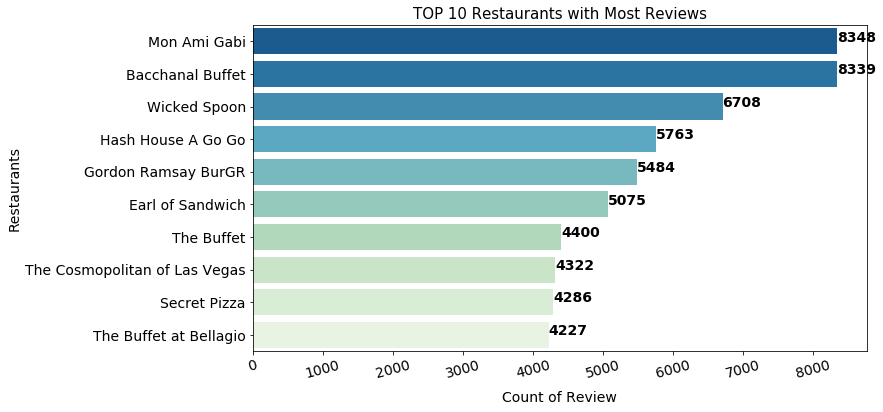

In [20]:
plt.figure(figsize=(11,6))
grouped = business[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

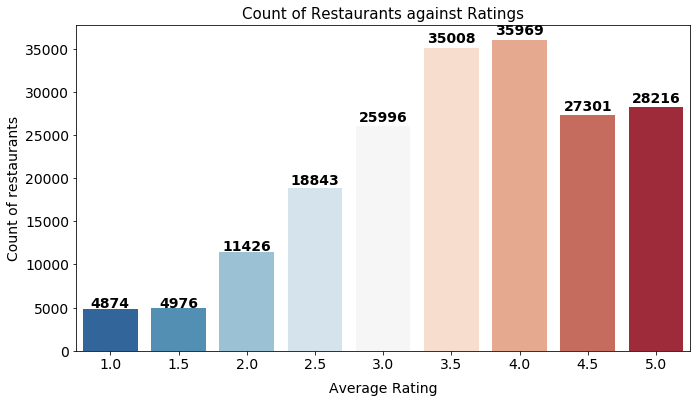

In [23]:
plt.figure(figsize=(11,6))
grouped = business.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

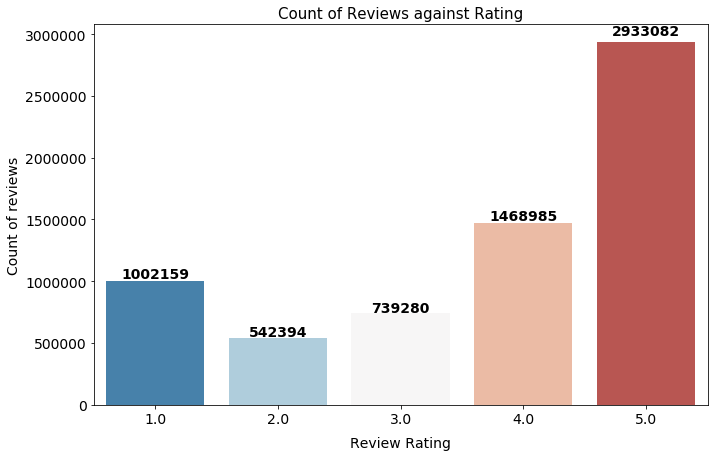

In [26]:
plt.figure(figsize=(11,7))
grouped = reviews.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [25]:
stars_all = business[['stars','name']]
star_distribute = stars_all.groupby(['stars']).count()
print ("Mean value of the stars = ",business['stars'].mean()) 
star_distribute = star_distribute.rename(columns = {'name':'Counts'})
# star_distribute = star_distribute.sort_values(['stars'], ascending=False)
star_distribute

Mean value of the stars =  3.585626839867296


,Counts
stars,
1.0,4874
1.5,4976
2.0,11426
2.5,18843
3.0,25996
3.5,35008
4.0,35969
4.5,27301
5.0,28216


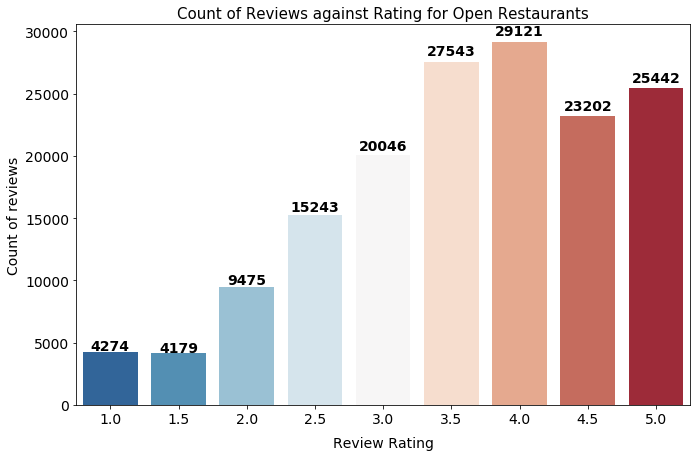

In [18]:
#comapre this with the total 

plt.figure(figsize=(11,7))
grouped = business.groupby('stars')['is_open'].sum().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating for Open Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

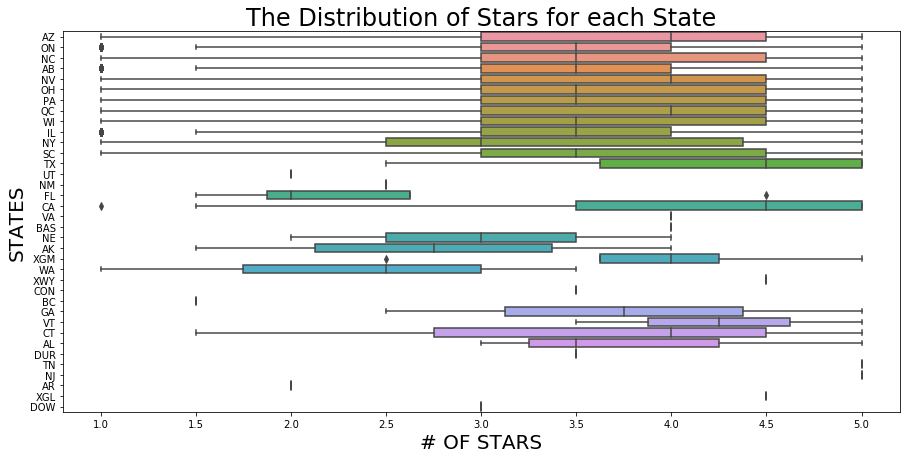

In [39]:
plt.figure(figsize=(15,7))   

ax = sns.boxplot(x=business['stars'],y = business['state']) 

plt.xlabel('# OF STARS', fontsize=20)
plt.ylabel('STATES', fontsize=20)
plt.title('The Distribution of Stars for each State', fontsize=24)
plt.show()

In [6]:
reviews['text_lenth']= reviews['text'].str.split().str.len()

In [13]:
reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_lenth
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,39.0


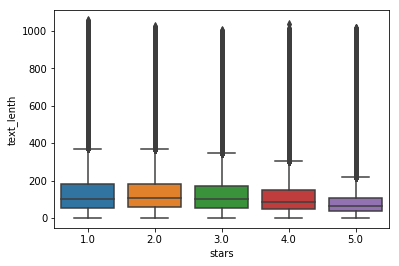

In [14]:
sns.boxplot(x='stars', y='text_lenth', data=reviews)

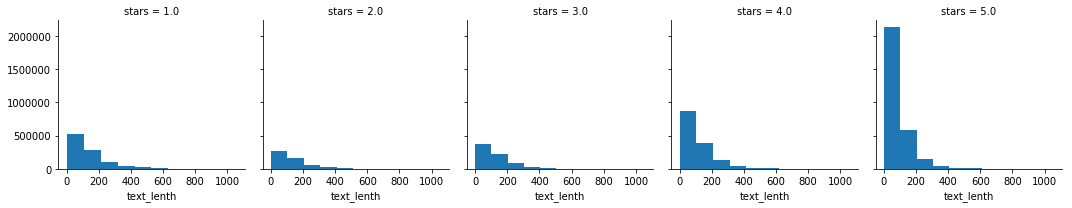

In [17]:
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text_lenth', bins=10)

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [5]:
#Creating regex pattern to parse the each overview
from nltk.stem.snowball import SnowballStemmer
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

#Stemming words using SnowballStemmer
stemmer = SnowballStemmer("english")

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#Creating unique list of available stopwords in the NLTK corpus
from nltk.corpus import stopwords
# this line below opened up the dowloader for me to go in download this specific stopwords 
# nltk.download()
stop_words = set(stopwords.words('english'))



In [ ]:
#for one star reviews
giant_string = []
all_words = []
for review in one_star_reviews: 
    cleaned = nltk.regexp_tokenize(str(review), pattern)
    tokens = [i.lower() for i in cleaned]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    meta_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stopped]
    string = ' '.join(meta_lemmatized)
    giant_string.append(string)
    [all_words.append(w) for w in meta_lemmatized]

In [84]:
reviews_nouns=[]

pos=nltk.pos_tag(all_words)
leng = len(pos)
for x in range(0,leng):
    if(pos[x][1]=="NN" or pos[x][1]=='VBP' or pos[x][1]=='VB'):
        reviews_nouns.append(pos[x][0])
       

In [85]:
all_words_fd = nltk.FreqDist(reviews_nouns)


In [86]:
# making a string and having world clous generate itself instead of trying to get the fd sepeartly 
# string = ' '.join(all_words)

In [87]:
top_200_two=all_words_fd.most_common(200)


In [88]:
dictOfWords_one = dict(top_200_two)
dictOfWords_one.pop("character", None) 

6746

In [89]:
def word_cloud(text):
    wordcloud = WordCloud(max_words=100,
                          ).generate_from_frequencies(text)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    


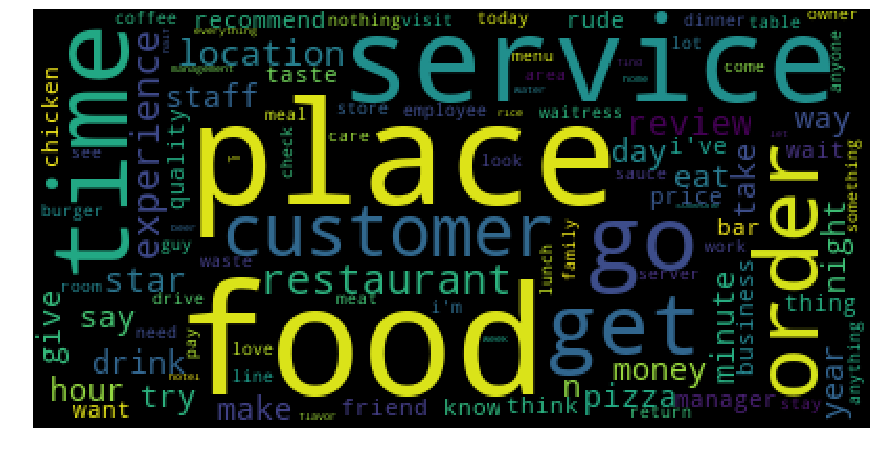

In [90]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_one)

In [91]:
#for two star words
all_words_two = []
reviews_nouns_two=[]

for review in two_star_reviews: 
    cleaned = nltk.regexp_tokenize(str(review), pattern)
    tokens = [i.lower() for i in cleaned]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    meta_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stopped]
    string = ' '.join(meta_lemmatized)
    [all_words_two.append(w) for w in meta_lemmatized]
    


pos_two=nltk.pos_tag(all_words)
leng_two = len(pos_two)
for x in range(0,leng_two):
    if( pos[x][1]=="NN" or pos[x][1]=='VBP' or pos[x][1]=='VB'):
        reviews_nouns_two.append(pos_two[x][0])
        

In [92]:
all_words_fd_two = nltk.FreqDist(reviews_nouns_two)
top_200_two=all_words_fd_two.most_common(200)
dictOfWords_two = dict(top_200_two)
dictOfWords_two.pop("character", None)

6746

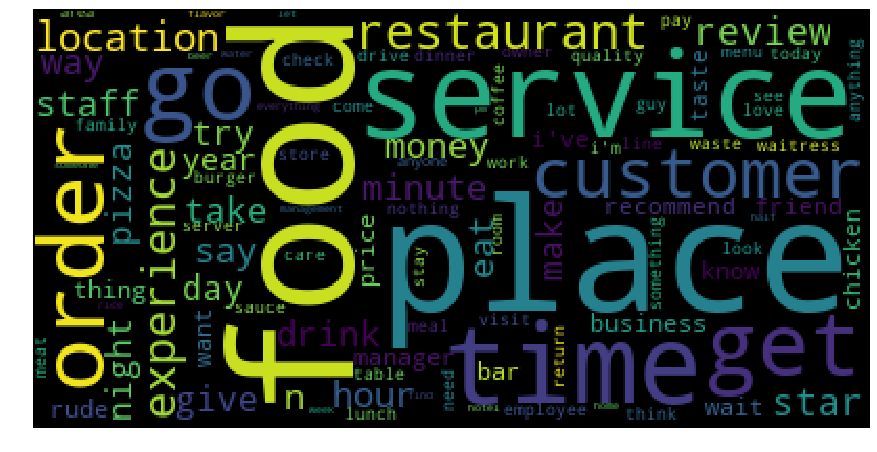

In [93]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_two)

In [94]:
#for three star words
reviews_nouns=[]
all_words = []
for review in three_star_reviews: 
    cleaned = nltk.regexp_tokenize(str(review), pattern)
    tokens = [i.lower() for i in cleaned]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    meta_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stopped]
    string = ' '.join(meta_lemmatized)
    [all_words.append(w) for w in meta_lemmatized]
    
    
    

In [95]:
pos=nltk.pos_tag(all_words)
leng = len(pos)
for x in range(0,leng):
    if( pos[x][1]=="NN" or pos[x][1]=='VBP' or pos[x][1]=='VB'):
        reviews_nouns.append(pos[x][0])

In [96]:
all_words_fd_three = nltk.FreqDist(reviews_nouns)
top_200_three=all_words_fd_three.most_common(200)
dictOfWords_three = dict(top_200_three)
dictOfWords_three.pop("character", None)

28551

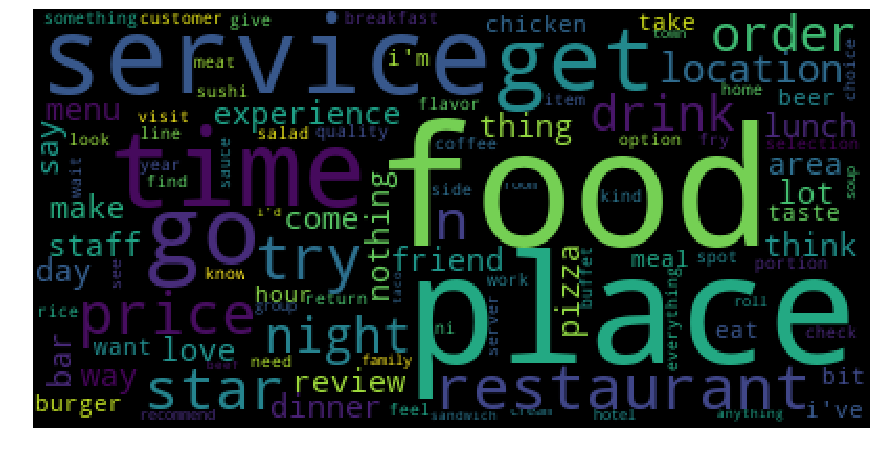

In [97]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_three)


In [98]:
#for four star 
reviews_nouns=[]
all_words = []
for review in four_star_reviews: 
    cleaned = nltk.regexp_tokenize(str(review), pattern)
    tokens = [i.lower() for i in cleaned]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    meta_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stopped]
    string = ' '.join(meta_lemmatized)
    [all_words.append(w) for w in meta_lemmatized]
    
   

In [99]:
pos=nltk.pos_tag(all_words)
leng = len(pos)
for x in range(0,leng):
    if( pos[x][1]=="NN" or pos[x][1]=='VBP' or pos[x][1]=='VB'):
        reviews_nouns.append(pos[x][0])

In [100]:
all_words_fd_four = nltk.FreqDist(reviews_nouns)
top_200_four=all_words_fd_four.most_common(200)
dictOfWords_four = dict(top_200_four)
dictOfWords_four.pop("character", None)

26233

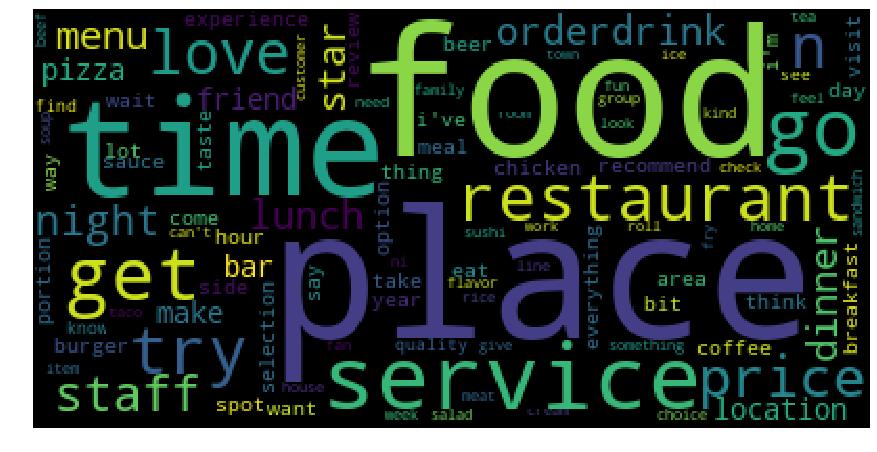

In [101]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_four)

In [6]:
#for five stars 
reviews_nouns=[]
all_words = []
for review in five_star_reviews: 
    cleaned = nltk.regexp_tokenize(str(review), pattern)
    tokens = [i.lower() for i in cleaned]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    meta_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stopped]
    string = ' '.join(meta_lemmatized)
    [all_words.append(w) for w in meta_lemmatized]
    
   

In [7]:
pos=nltk.pos_tag(all_words)
leng = len(pos)
for x in range(0,leng):
    if(pos[x][1]=="NN" or pos[x][1]=='VBP' or pos[x][1]=='VB'):
        reviews_nouns.append(pos[x][0])

In [8]:
all_words_fd_five = nltk.FreqDist(reviews_nouns)
top_200_five=all_words_fd_five.most_common(200)
dictOfWords_five = dict(top_200_five)
dictOfWords_five.pop("character", None)

20495

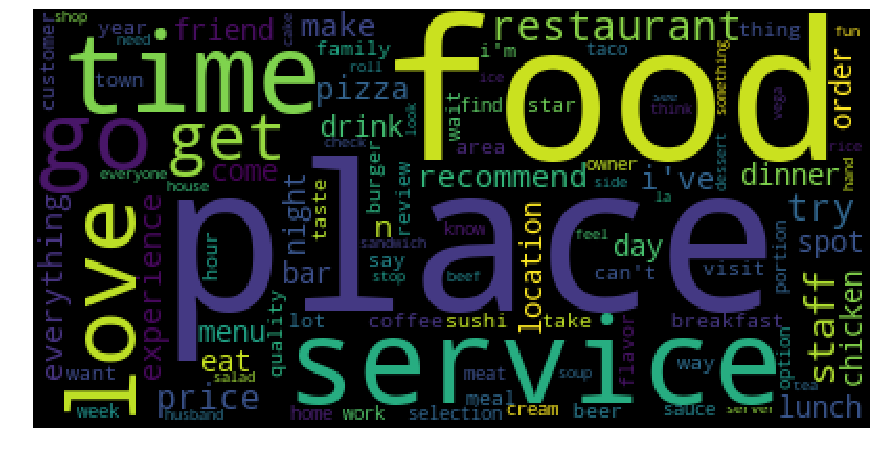

In [82]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_five)

In [ ]:
# another version off world cloud for five

In [16]:
from PIL import Image
from os import path
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    

bagel_mask = np.array(Image.open(path.join(d, "bagel_PNG89.png")))

def word_cloud(text):
    wordcloud = WordCloud(max_words=100, mask= bagel_mask,background_color="white"
                          ).generate_from_frequencies(text)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

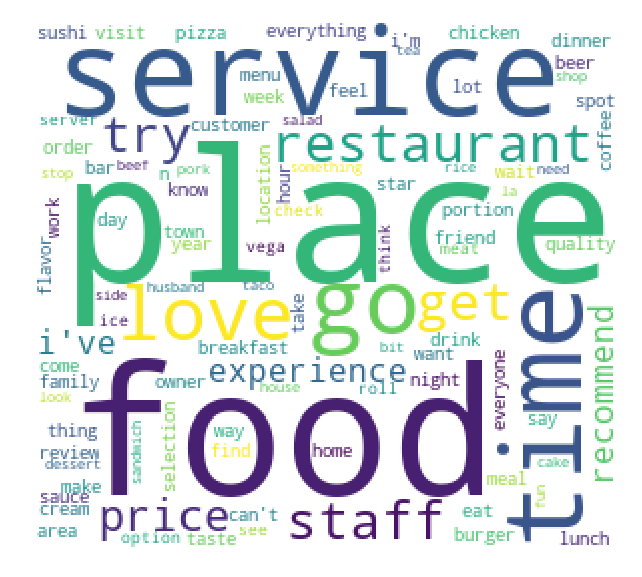

In [17]:
plt.figure(figsize=(15,10))
word_cloud(dictOfWords_five)

In [29]:
#Bringing in pickles
import pickle
pickle_rf_use = open("rf_class_usef","rb")
rf_use = pickle.load(pickle_rf_use)

pickle_off = open("log_reg_rating","rb")
lin_reg_rating = pickle.load(pickle_off)

EOFError: Ran out of input